<a href="https://colab.research.google.com/github/manasapjoshi/Data_Analysis_Projects/blob/main/NLP_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NLP (Natural Language Processing) project**
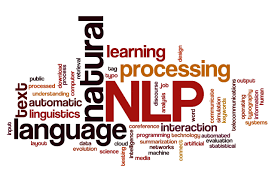
Natural language processing (NLP) is a branch of artificial intelligence (AI) that enables computers to comprehend, generate, and manipulate human language. Natural language processing has the ability to interrogate the data with natural language text or voice. This is also called “language in.

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
#load the dataset
from google.colab import files
uploaded = files.upload()

Saving Instruments_Reviews.csv to Instruments_Reviews.csv


In [ ]:
df=pd.read_csv('Instruments_Reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


**Sentiment Analysis**

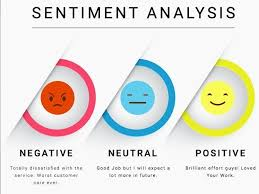

In [ ]:
#data preprocessing
df.isnull().sum()


,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
#filling missing values
df.reviewText.fillna(value='',inplace=True)

In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
#filling missing values of rreviewer name
df.reviewerName.fillna(value='Unknown',inplace=True)

In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,0
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
#concatenate columns
df['Reviews'] = df['reviewText'] +''+df['summary']
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [ ]:
#drop columns
df.drop(['reviewText','summary'],axis=1,inplace=True)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [ ]:
df.overall.value_counts()

,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


<Axes: ylabel='count'>

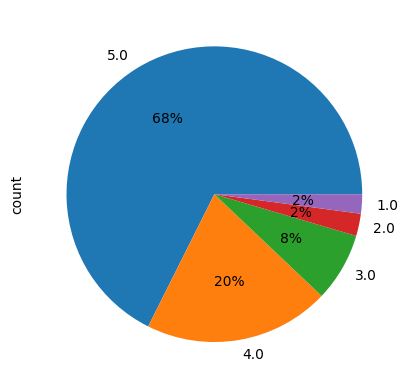

In [ ]:
#visaulize the overall rating using pie chart
df.overall.value_counts().plot.pie(autopct='%1.0f%%')

In [ ]:
#labeling with positive negative neutral
def labelling(x):
    if x<3:
        return 'Negative'
    elif x==3:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
df['Sentiment'] = df.overall.apply(labelling)

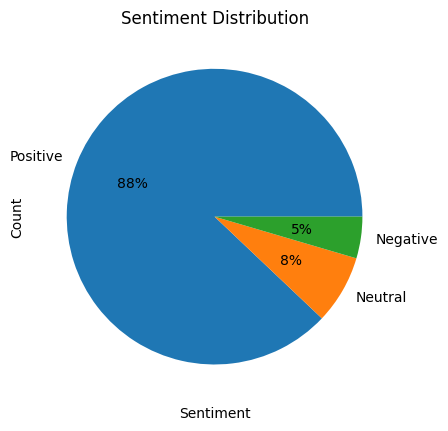

In [ ]:
#visualize with the help of sentiment
df['Sentiment'].value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='overall'>

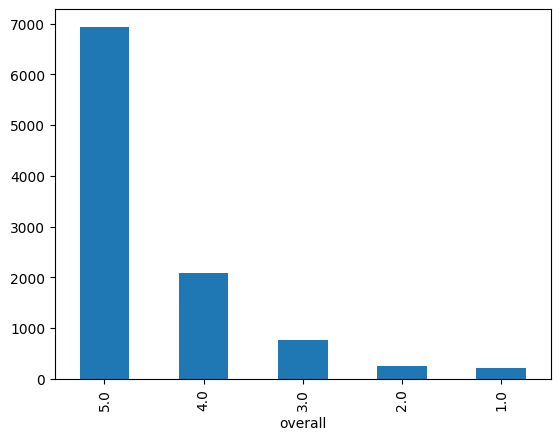

In [ ]:
#visaulize the overall rating using bar chart
df.overall.value_counts().plot.bar()

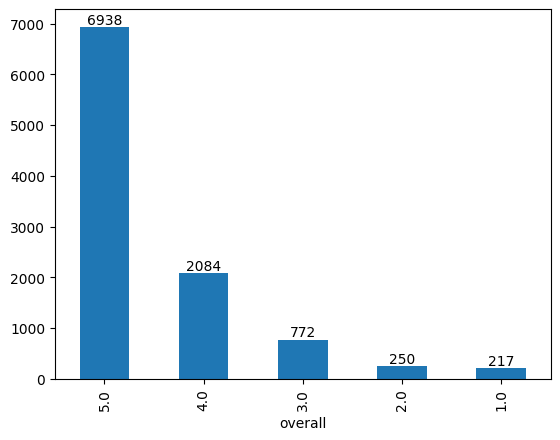

In [ ]:
#display number on the bar char
#visaulize the overall rating using bar chart
df.overall.value_counts().plot.bar()

#display number on the bar char
# Obtain the x-coordinates of the bars
x_coords = range(len(df.overall.value_counts().index))

for i, count in enumerate(df.overall.value_counts()):
    plt.text(x_coords[i], count, count, ha='center', va='bottom')

In [ ]:
#text preprocessing
import string
import re
#text cleaning
def clean_text(text):
    #lowercase text
    text = text.lower()

    #cleaning punctuation
    punc=str.maketrans(string.punctuation,' '*len(string.punctuation))
    text=text.translate(punc)

    #remove numbers in text
    text=re.sub(r'\d+','',text)

    #remove hyperlink
    text=re.sub(r'https?://\S+|www\.\S+','',text)

    #delete newline
    text=re.sub(r'\n','',text)

    #delete extra space
    text=re.sub(r'\s+',' ',text)

    return text

**Stopwords**

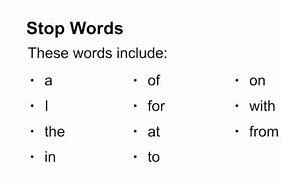

Stemming vs Lemmatization
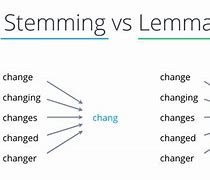

In [ ]:
#import lematization
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def Text_processing (text):
  process_text=list()
  lematizer=WordNetLemmatizer()

  #token of words
  token=nltk.word_tokenize(text)

  #lematization
  for word in token:
    if word not in stopwords:
      process_text.append(lematizer.lemmatize(word))
  return(" ".join(process_text))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Apply the function
df['Reviews']=df['Reviews'].apply(clean_text)
df['Reviews']=df['Reviews'].apply(Text_processing)


In [ ]:
df['Reviews'].head()

,Reviews
0,much write exactly supposed filter pop sound r...
1,product exactly quite affordable realized doub...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pop ...
4,pop filter great look performs like studio fil...


**Polarity**
Polarity refers to the degree of positivity or negativity in a given text. In NLP, polarity analysis is used to determine the sentiment of a text, whether it is positive, negative, or neutral.


In [ ]:
#Example
import textblob
from textblob import TextBlob

text="I love using this product.It is fantastic"
blob=TextBlob(text)
print(blob.sentiment)

Sentiment(polarity=0.45, subjectivity=0.75)


In [ ]:
#polarity
import textblob
from textblob import TextBlob
df['polarity']=df['Reviews'].apply(lambda x: textblob.TextBlob(x).sentiment.polarity)

In [ ]:
df.head()


,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment,polarity
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive,0.4000
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive,0.0000
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000


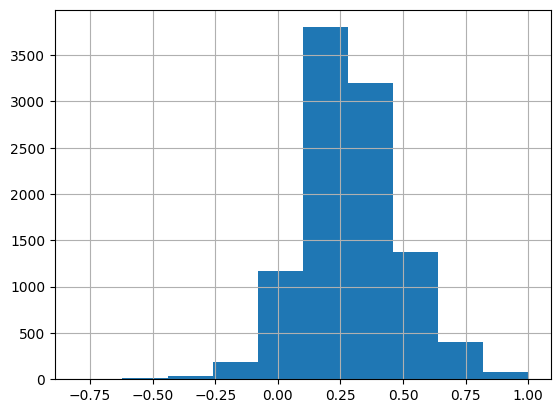

In [ ]:
#visualize polarity data into histogram
import matplotlib.pyplot as plt
df['polarity'].hist()
plt.show()

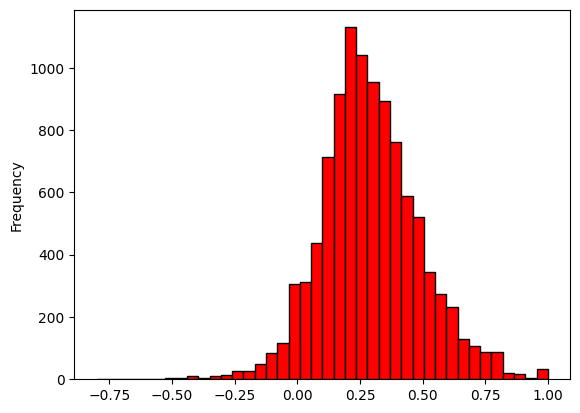

In [ ]:
df['polarity'].plot(kind='hist',bins=40,color='red',linewidth=1,edgecolor='black')
plt.show()

Length of Review

In [ ]:
#length of review
df['length']=df['Reviews'].apply(len)
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment,polarity,length
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive,0.4000,150
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive,0.0000,329
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675,296
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250,169
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000,114


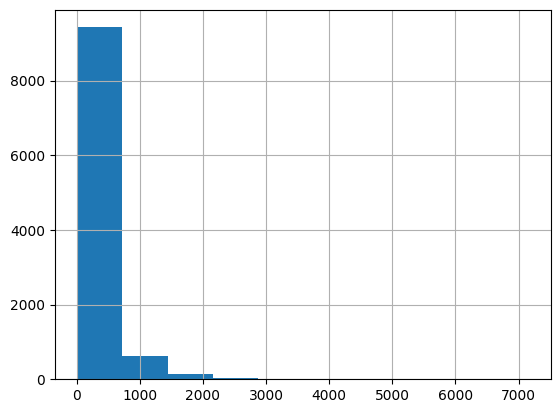

In [ ]:
#visualize length of review using histogram chart
df['length'].hist()
plt.show()

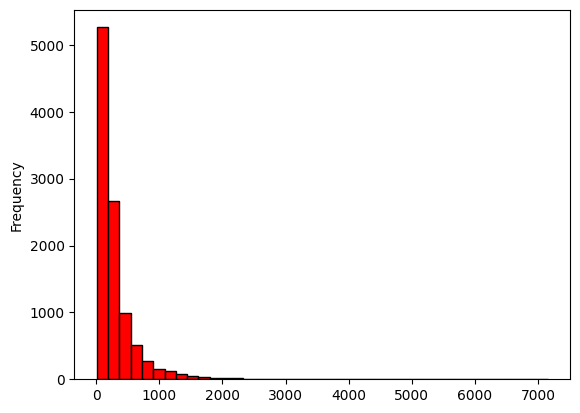

In [ ]:
df['length'].plot(kind='hist',bins=40,color='red',linewidth=1,edgecolor='black')
plt.show()

In [ ]:
#count the words
df['word_count']=df['Reviews'].apply(lambda x: len(x.split()))


In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,Reviews,Sentiment,polarity,length,word_count
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",much write exactly supposed filter pop sound r...,Positive,0.4000,150,24
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable realized doub...,Positive,0.0000,329,52
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive,0.1675,296,45
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive,0.4250,169,23
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive,0.8000,114,18


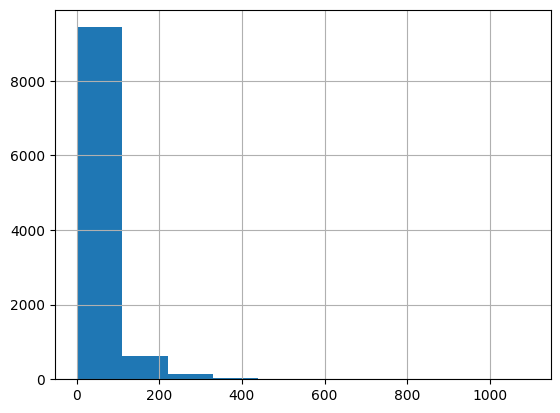

In [ ]:
#visaulize the word count
df['word_count'].hist()
plt.show()


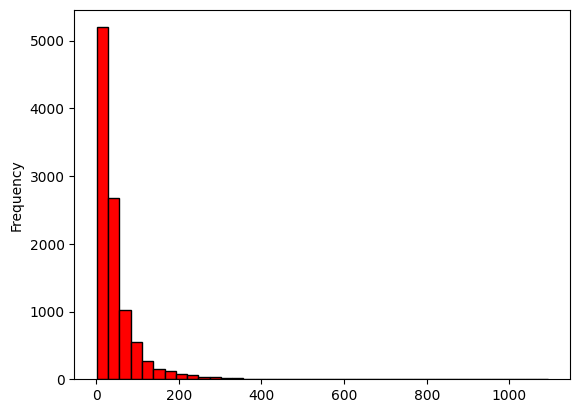

In [ ]:
df['word_count'].plot(kind='hist',bins=40,color='red',linewidth=1,edgecolor='black')
plt.show()

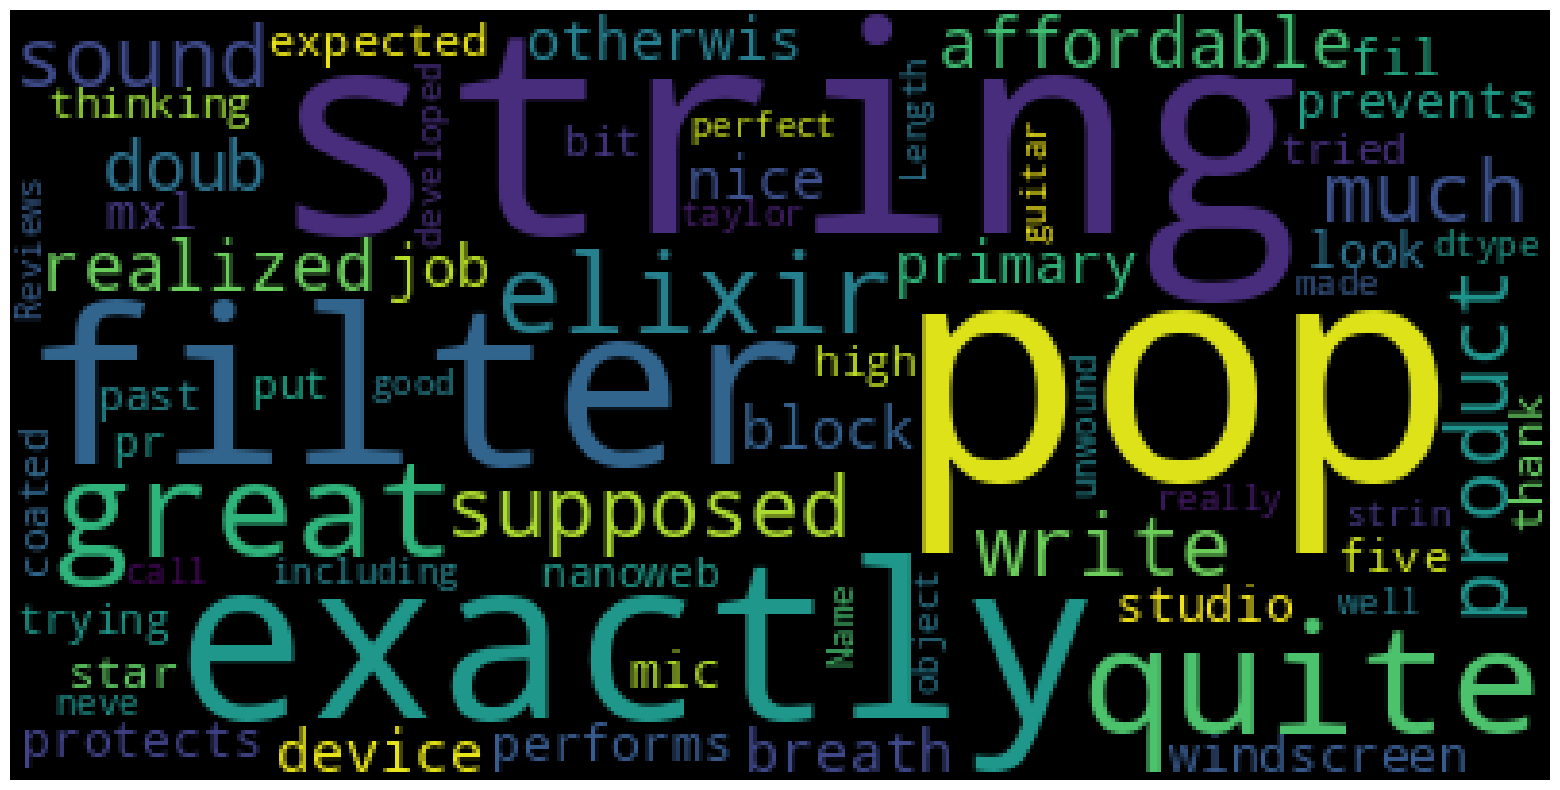

In [ ]:
#word cloud of reviews with positive sentiments
#visualze data using wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud(max_words=100,width=400,height=200).generate(str(df[df['Sentiment']=='Positive']['Reviews']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

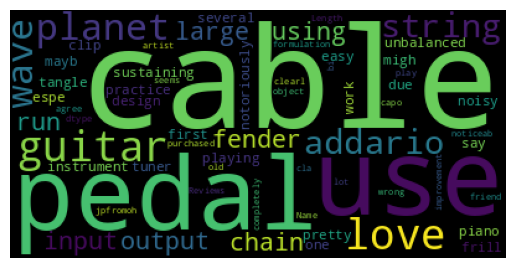

In [ ]:
#word cloud showing the neutral review
wordcloud=WordCloud(max_words=100,width=400,height=200).generate(str(df[df['Sentiment']=='Neutral']['Reviews']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

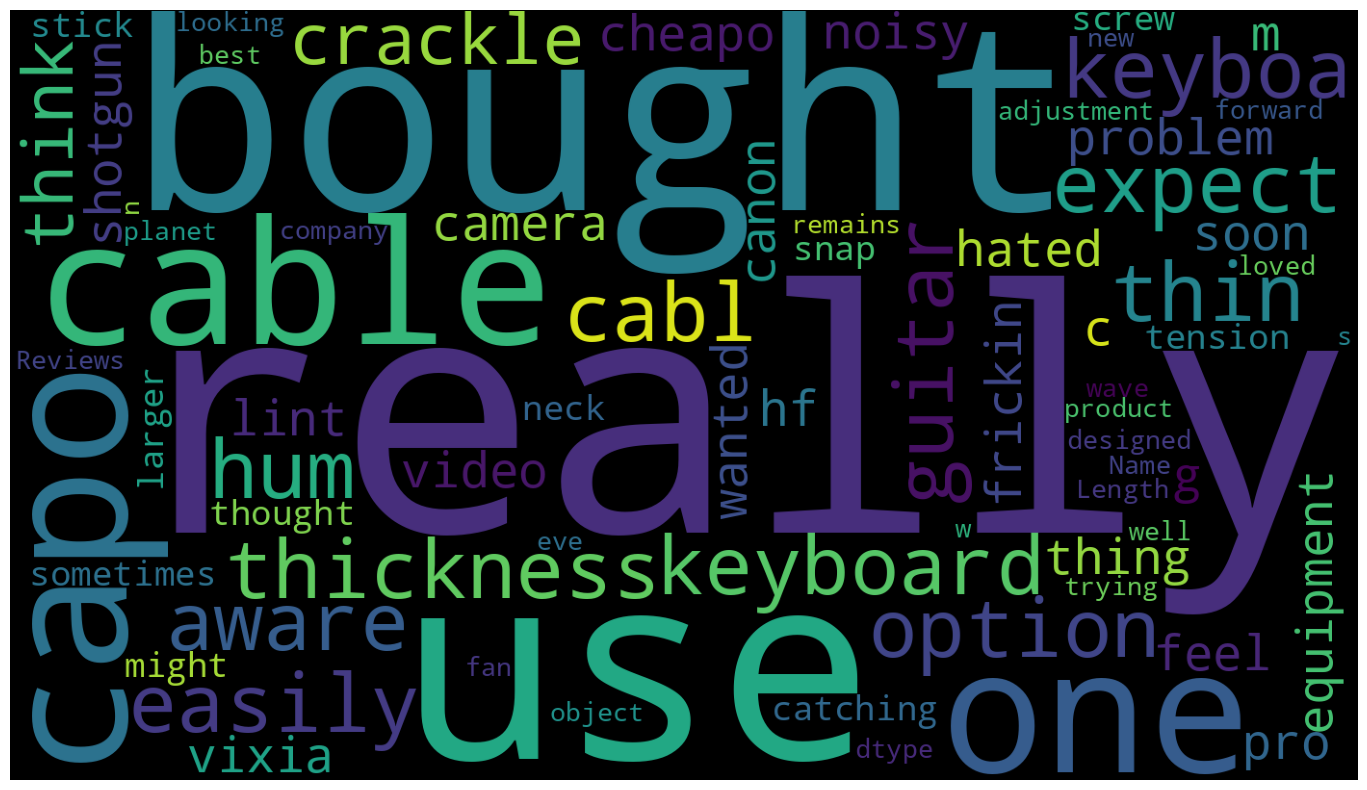

In [ ]:
#word cloud using the negative review
wordcloud=WordCloud(max_words=600,width=1400,height=800).generate(str(df[df['Sentiment']=='Negative']['Reviews']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()